<a href="https://colab.research.google.com/github/KZhambyl/ML_insurance_prediction/blob/main/Car_accident_Kazakhstan_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This machine learning project focuses on building a predictive model for insurance-related analytics using a structured dataset containing demographic, vehicle, and insurance policy information. The objective is to uncover patterns and relationships that can aid in tasks such as:

- Risk assessment  
- Premium prediction  

---

## Features Overview

The dataset includes the following features:

### Personal and Demographic Attributes
- `Unique number`: Identifier for each record
- `Age`: Age of the policyholder
- `Citizenship`: Country of citizenship
- `Gender`: Gender of the policyholder
- `Driving_experience`: Number of years of driving experience

### Vehicle Information
- `Model`: Model of the vehicle
- `Brand`: Vehicle brand
- `Vehicle_type`: Type/class of the vehicle
- `Year_of_manufacture`: The year the vehicle was manufactured
- `Steering_wheel_location`: Left-hand or right-hand steering
- `Color`: Vehicle color

### Policy and Insurance Details
- `Bonus_Malus`: Policyholder's bonus-malus score
- `Insurance_period`: Duration of the insurance policy
- `Privileges`: Special conditions or discounts applied to the policy
- `Insurance_premium`: Cost of the insurance premium

### Geographical and Event Data
- `City`: City where the policyholder resides
- `Accident_region`: Region where an accident occurred
- `Loss_amount`: Total loss amount from claims

---

## Project Goal

The goal is to leverage this rich feature set to train robust machine learning models that can:

- Accurately predict insurance premiums  
- Support smarter underwriting and pricing decisions

Through exploratory data analysis, feature engineering, and model evaluation, this project aims to enhance the efficiency and accuracy of insurance data modeling.



#Data cleaning

In [1]:
import pandas as pd
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


pd.reset_option('display.max_rows')

In [2]:
sns.set_style('darkgrid')

PALETTE = "Set3"
sns.set_palette(PALETTE)
sns.color_palette(PALETTE)

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [3]:
url = "https://raw.githubusercontent.com/g0dfury/Kazakhstan-Road-Accident-Data-Analysis/main/kz_road_accident.xlsx"
df = pd.read_excel(url, engine='openpyxl')

df.head()

,Unique number,Age,Citizenship,Driving_experience,Gender,Bonus_Malus,City,Model,Brand,Vehicle_type,Year_of_manufacture,Steering_wheel_location,Color,Insurance_period,Insurance_premium,Privileges,Accident_region,Loss_amount
0,74d88aec9cfe39a1bc5a93314c4326dc,30,Казахстан,10,М,8,Алматы,156,Alfa romeo,Легковые автомобили,2000-12-01,Слева,красный,14.06.2013-13.06.2014,17625,NaN,NaN,NaN
1,c13fe1fef2192e82056e26544c3efed3,36,Казахстан,17,М,8,Нур-Султан,156,Alfa romeo,Легковые автомобили,2001-12-01,Слева,синий,19.07.2013-18.07.2014,8484,NaN,NaN,NaN
2,8dd751c0f9c0cf216303a0d445099e1b,46,Казахстан,28,М,8,Алматы,Rsv 1000r,Aprilia,Мотоциклы и мотороллеры,2005-12-01,Слева,красный,07.06.2013-06.06.2014,8031,NaN,NaN,NaN
3,005f21aeed2db9c1694f724f365be6b5,45,Казахстан,13,М,7,Нур-Султан,80,Audi,Легковые автомобили,1992-12-01,Слева,серебристый металлик архивный,30.05.2013-29.11.2013,6709,NaN,NaN,NaN
4,00a216cee7321c4514ecbe9cbd97a4eb,48,Казахстан,18,М,9,Затобольск,С4,Audi,Легковые автомобили,1995-12-01,Слева,серый металлик,28.05.2013-27.05.2014,8257,NaN,NaN,NaN


In [4]:
df.shape

(10909, 18)

In [5]:
for col in df.columns:
    print(f"--- Value counts for: {col} ---")
    print(df[col].value_counts(dropna=True))
    print("\n")

--- Value counts for: Unique number ---
Unique number
b7c927b072a0912dbdc401d48ad68134    20
ddece7b2c11c98067d2afb2c5f9b76a4    18
d0007134147a341a79b8983b1c2203cd    18
1afa374ad63fc594e2bd2310e4c93430    15
29c7cbd8a3f4ab746be4428b68718532    14
                                    ..
39e7c89c7b09504abaea23cff0f98d00     1
3a1fe6b09c411ee2a73a512081086242     1
3a7544c8d7c1fb2eb65f864ca391c664     1
3bafb3ea5435c99f0120673fa92d5e13     1
37cc5d0b322af4c898d5a21b6b7df40b     1
Name: count, Length: 9420, dtype: int64


--- Value counts for: Age ---
Age
41    342
37    331
38    319
46    310
47    309
     ... 
86      2
89      1
87      1
90      1
91      1
Name: count, Length: 68, dtype: int64


--- Value counts for: Citizenship ---
Citizenship
Казахстан      10866
Россия            37
Кыргызстан         2
Таджикистан        1
Индия              1
Молдова            1
Украина            1
Name: count, dtype: int64


--- Value counts for: Driving_experience ---
Driving_experience
19

In [6]:
df['Unique number'].duplicated().sum()

np.int64(1489)

In [7]:
df[df['Unique number'].duplicated(keep='first')]

,Unique number,Age,Citizenship,Driving_experience,Gender,Bonus_Malus,City,Model,Brand,Vehicle_type,Year_of_manufacture,Steering_wheel_location,Color,Insurance_period,Insurance_premium,Privileges,Accident_region,Loss_amount
31,0a3a1e71a726f4744afbdb2ef1357148,30,Казахстан,11,М,5,Петропавловск,80,Audi,Легковые автомобили,1991-12-01,Слева,светло-зелёный,22.05.2013-21.05.2014,9503,NaN,NaN,NaN
35,0b637b1f2af75cfdc9cbec2be4b9a9f7,50,Казахстан,23,М,8,Костанай,B4,Audi,Легковые автомобили,1994-01-01,Слева,зеленый металлик,22.06.2013-21.06.2014,11058,NaN,NaN,NaN
42,0dc702ef13e47f0edf9ab207a458f551,40,Казахстан,10,М,5,Петропавловск,B4,Audi,Легковые автомобили,1992-12-01,Слева,синий,25.05.2013-24.05.2014,7241,NaN,NaN,NaN
97,25f655aeee979fd8bbd206c71b5c1d5f,38,Казахстан,17,М,8,"Атбасар,Атбасар",С4,Audi,Легковые автомобили,1992-01-01,Слева,бежевый,26.06.2013-25.06.2014,5988,NaN,NaN,NaN
197,4aa67706f2fd59f8655bc7e640ab7bc8,31,Казахстан,12,М,8,Алматы,С4,Audi,Легковые автомобили,1992-12-01,Слева,белый,07.06.2013-06.06.2014,17625,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10883,fa80930263735909912f9a70d4773250,44,Казахстан,27,М,8,Крамское,31512,УАЗ,Легковые автомобили,1991-01-01,Слева,песочный,27.06.2013-07.06.2014,10483,NaN,NaN,NaN
10895,4eb11fbabd2d366bffd81beb67e20925,54,Казахстан,19,Ж,9,"Атбасар,Атбасар",.,Хуньсень,Легковые автомобили,2006-12-01,Слева,черный,14.06.2013-07.06.2014,6372,NaN,NaN,NaN
10896,5a5b739b24c1a89c5d6906b5975032d8,34,Казахстан,13,М,8,Костанай,Са-6371а4,Цзефан,Легковые автомобили,2012-12-01,Слева,белый,21.05.2013-20.11.2013,5135,NaN,NaN,NaN
10897,ee70a391db1caa552a0885d7211417ee,39,Казахстан,16,М,6,Кокшетау,Са-6371а4,Цзефан,Легковые автомобили,2012-12-01,Слева,серебристый,19.06.2013-18.12.2013,4322,NaN,NaN,NaN


In [8]:
df.drop(columns=['Unique number', 'Color'], inplace=True)

In [9]:
df.isna().sum()

,0
Age,0
Citizenship,0
Driving_experience,0
Gender,0
Bonus_Malus,0
City,0
Model,0
Brand,0
Vehicle_type,0
Year_of_manufacture,0


In [10]:
df['Privileges'].unique()

array([nan, 'Инвалид ', 'Пенсионер ', 'Приравн.Лицо ',
       'Инвалид Пенсионер ', 'Участник ВОВ ', 'Приравн.Лицо Инвалид '],
      dtype=object)

In [11]:
df['Privileges'].fillna('Не инвалид', inplace=True)

<ipython-input-11-fd763b91c103>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Privileges'].fillna('Не инвалид', inplace=True)


In [12]:
df['Accident_region'] = df['Accident_region'].fillna(df['City'])

In [13]:
df['Loss_amount'] = df['Loss_amount'].fillna(df['Loss_amount'].mean().round())

In [14]:
df[['City', 'Accident_region', 'Loss_amount', 'Privileges']].isna().sum()

,0
City,0
Accident_region,0
Loss_amount,0
Privileges,0


In [15]:
invalid_experience = df[df['Driving_experience'] > df['Age']]
invalid_experience

,Age,Citizenship,Driving_experience,Gender,Bonus_Malus,City,Model,Brand,Vehicle_type,Year_of_manufacture,Steering_wheel_location,Insurance_period,Insurance_premium,Privileges,Accident_region,Loss_amount
2775,59,Казахстан,88,М,7,Караганда,626,Mazda,Легковые автомобили,1995-12-01,Слева,04.06.2013-03.06.2014,8408,Не инвалид,Караганда,356479.0


In [16]:
df.drop(index=invalid_experience.index, inplace=True)

In [17]:
df[df['Driving_experience'] < 0]

,Age,Citizenship,Driving_experience,Gender,Bonus_Malus,City,Model,Brand,Vehicle_type,Year_of_manufacture,Steering_wheel_location,Insurance_period,Insurance_premium,Privileges,Accident_region,Loss_amount


In [18]:
print(df.columns.tolist()) # there is a space in the name of the column 'Vehicle_type '
df.columns = df.columns.str.strip() # remove all the spaces in the name of columns
df['Vehicle_type'].value_counts()

['Age', 'Citizenship', 'Driving_experience', 'Gender', 'Bonus_Malus', 'City', 'Model', 'Brand', 'Vehicle_type ', 'Year_of_manufacture', 'Steering_wheel_location', 'Insurance_period', 'Insurance_premium', 'Privileges', 'Accident_region', 'Loss_amount']


,count
Vehicle_type,
Легковые автомобили,10515
Грузовые автомобили,264
Автобусы до 16 п/м вкл.,50
Мотоциклы и мотороллеры,47
"Автобусы, свыше 16 п/м",26
Прицеп к грузовой а/м,4
Прицеп к легковой а/м,2


In [19]:
df = df[~df['Vehicle_type'].isin([
    'Прицеп к грузовой а/м',
    'Прицеп к легковой а/м'
])]

vehicle_mapping = {
    'Легковые автомобили': 'Легковые автомобили',
    'Мотоциклы и мотороллеры': 'Мотоциклы',
    'Грузовые автомобили': 'Грузовые',
    'Автобусы до 16 п/м вкл.': 'Автобусы',
    'Автобусы, свыше 16 п/м': 'Автобусы'
}


df.loc[:, 'Vehicle_type'] = df['Vehicle_type'].map(vehicle_mapping)

print(df['Vehicle_type'].value_counts())

Vehicle_type
Легковые автомобили    10515
Грузовые                 264
Автобусы                  76
Мотоциклы                 47
Name: count, dtype: int64


#Feature engineering and Analysis

In [20]:
df['Year_of_manufacture'] = pd.to_datetime(df['Year_of_manufacture'])
df['Car_age'] = 2025 - df['Year_of_manufacture'].dt.year
df.drop(columns=['Year_of_manufacture'], inplace=True)

<ipython-input-20-7176770f8434>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_of_manufacture'] = pd.to_datetime(df['Year_of_manufacture'])
<ipython-input-20-7176770f8434>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car_age'] = 2025 - df['Year_of_manufacture'].dt.year
<ipython-input-20-7176770f8434>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [21]:
df[['start_date', 'end_date']] = df['Insurance_period'].str.split('-', expand=True)
df['start_date'] = pd.to_datetime(df['start_date'], format='%d.%m.%Y')
df['end_date'] = pd.to_datetime(df['end_date'], format='%d.%m.%Y')

df['Insurance_months'] = (
    (df['end_date'].dt.year - df['start_date'].dt.year) * 12 +
    (df['end_date'].dt.month - df['start_date'].dt.month) + 1
)

In [22]:
df['Insurance_months'].value_counts()

,count
Insurance_months,
13,7759
7,1725
12,508
11,185
8,183
9,177
10,167
2,79
1,70


In [23]:
df['Steering_wheel_location'].value_counts()

,count
Steering_wheel_location,
Слева,10065
Справа,837


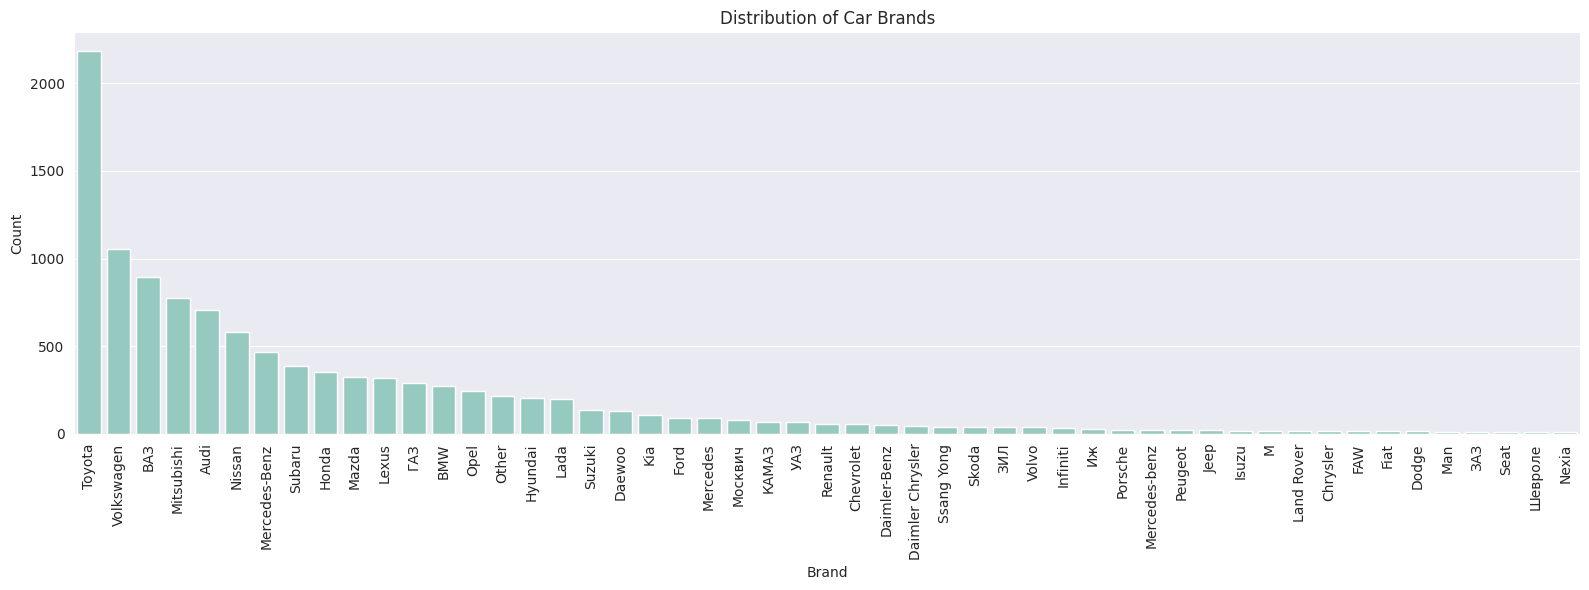

In [24]:
df['Brand'] = df['Brand'].replace({'Лада': 'Lada'})

top_brands = df['Brand'].value_counts().nlargest(50).index

df['Brand'] = df['Brand'].apply(lambda b: b if b in top_brands else 'Other')


brand_counts = df['Brand'].value_counts()

plt.figure(figsize=(16, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [25]:
print("Number of models of the vechicle: ", df["Model"].nunique())
models = df['Model'].value_counts()
models

Number of models of the vechicle:  1101


,count
Model,
Camry,437
Passat,371
.,325
Golf,232
Rav 4,229
...,...
Wagon r+,1
Jimny,1
Bandit,1


In [26]:
df[df['Model'] == '.'].groupby(['Brand', 'Car_age', 'Vehicle_type']).size()


Brand  Car_age  Vehicle_type       
Audi   14       Легковые автомобили    1
       29       Легковые автомобили    1
       35       Легковые автомобили    1
BMW    23       Легковые автомобили    2
       27       Легковые автомобили    2
                                      ..
Иж     26       Легковые автомобили    1
       35       Легковые автомобили    1
КАМАЗ  13       Грузовые               2
       34       Грузовые               1
УАЗ    12       Легковые автомобили    1
Length: 192, dtype: int64

The unknown models are very scattered, with lots of unique combinations.

In [27]:
df_unknown = df[df['Model'] == '.']
top_combinations = df_unknown.groupby(['Brand', 'Car_age', 'Vehicle_type']).size().reset_index(name='count')
top_combinations.sort_values('count', ascending=False).head(10)

,Brand,Car_age,Vehicle_type,count
99,Mercedes-Benz,34,Легковые автомобили,8
178,Volkswagen,33,Легковые автомобили,7
34,Daimler-Benz,37,Легковые автомобили,6
153,Renault,31,Легковые автомобили,6
126,Other,13,Грузовые,5
20,Daimler Chrysler,20,Легковые автомобили,5
32,Daimler-Benz,27,Легковые автомобили,5
96,Mercedes-Benz,31,Легковые автомобили,5
97,Mercedes-Benz,32,Легковые автомобили,5
95,Mercedes-Benz,30,Легковые автомобили,4


In [28]:
df['Model'] = df['Model'].replace('.', 'Unknown')

In [29]:
top_models = df['Model'].value_counts().head(50).index
df['Model'] = df['Model'].apply(lambda m: m if m in top_models else 'Other')

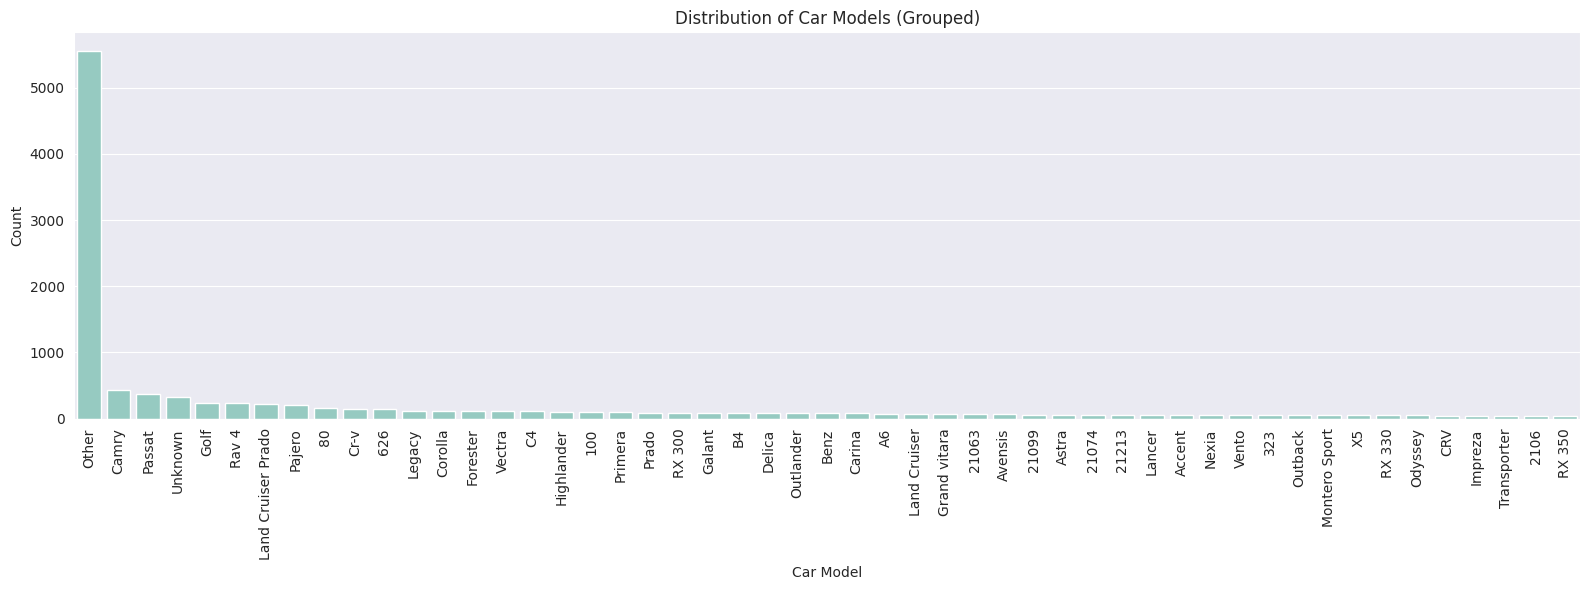

In [30]:
model_counts = df['Model'].value_counts()

plt.figure(figsize=(16, 6))
sns.barplot(x=model_counts.index, y=model_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Car Models (Grouped)')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [31]:
df['Brand_Model'] = df['Brand'].astype(str) + ' ' + df['Model'].astype(str)
df.drop(columns=['Brand', 'Model', 'start_date','end_date'], inplace=True)


The value of model is meaningfull only with combination of brand.

In [32]:
df.describe()

,Age,Driving_experience,Bonus_Malus,Insurance_premium,Loss_amount,Car_age,Insurance_months
count,10902.000000,10902.000000,10902.00000,10902.000000,1.090200e+04,10902.000000,10902.000000
mean,47.351862,18.012933,7.36718,10933.732618,3.564790e+05,25.777472,11.585764
std,12.795866,8.751055,1.70596,5732.619701,5.051896e+04,7.735468,2.582770
min,24.000000,0.000000,1.00000,66.000000,1.572100e+04,12.000000,1.000000
25%,37.000000,12.000000,7.00000,6412.750000,3.564790e+05,19.000000,12.000000
50%,46.000000,18.000000,8.00000,9479.500000,3.564790e+05,26.000000,13.000000
75%,56.000000,20.000000,9.00000,15667.000000,3.564790e+05,31.000000,13.000000
max,91.000000,64.000000,9.00000,59669.000000,2.525000e+06,70.000000,13.000000


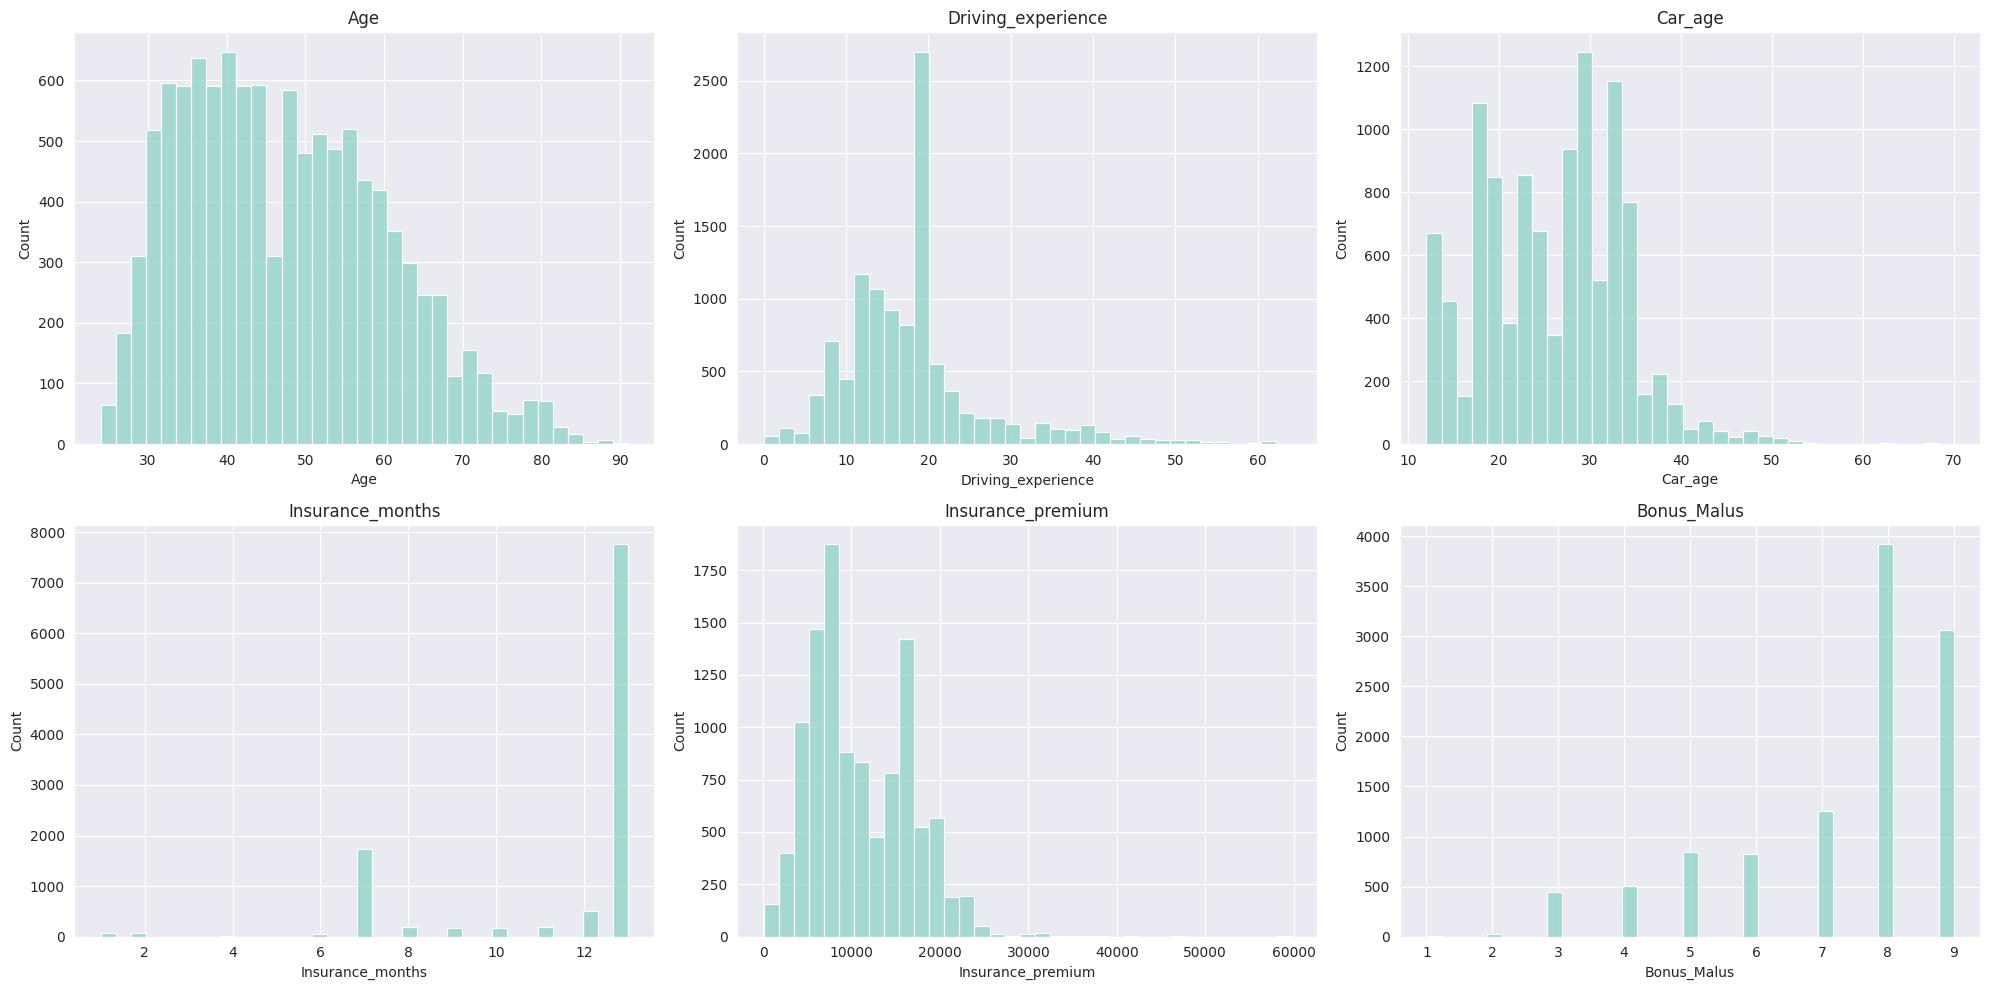

In [33]:
columns = ['Age', 'Driving_experience', 'Car_age', 'Insurance_months', 'Insurance_premium', 'Bonus_Malus']


fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()


for i, column in enumerate(columns):
    sns.histplot(data=df,
                 x=column,
                 bins=35,
                 ax=axes[i],
                 kde=False)

    axes[i].set_title(column)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

In [34]:
df['Premium_per_month'] = df['Insurance_premium'] / df['Insurance_months']
df.drop(columns=['Insurance_premium','Insurance_months'], inplace=True)
df['Premium_per_month'].describe()

,Premium_per_month
count,10902.000000
mean,925.788337
std,423.239982
min,39.000000
25%,580.153846
50%,844.538462
75%,1252.076923
max,4589.923077


The target is premium per month.

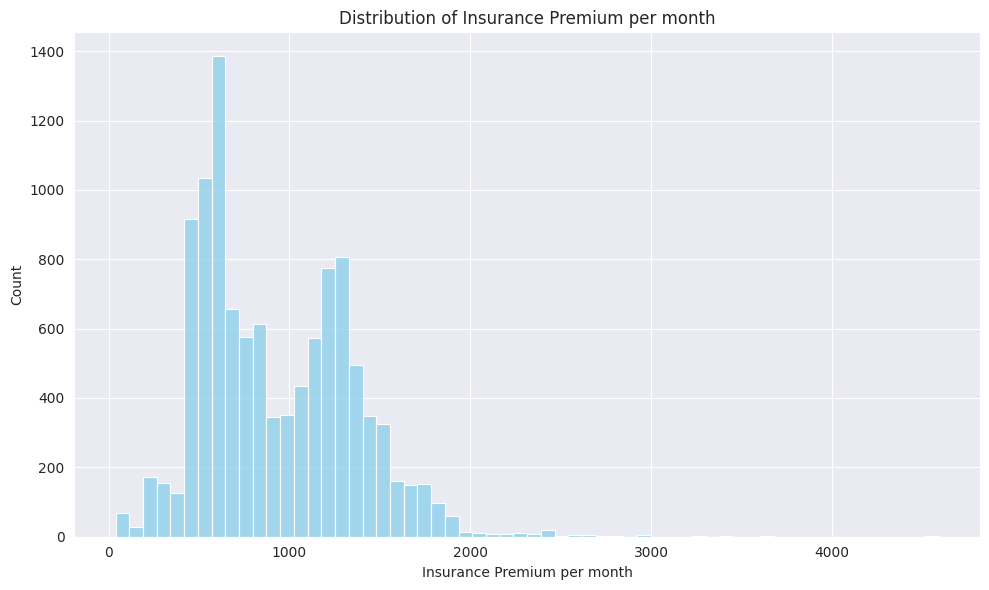

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Premium_per_month'], bins=60, color='skyblue')
plt.title('Distribution of Insurance Premium per month')
plt.xlabel('Insurance Premium per month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

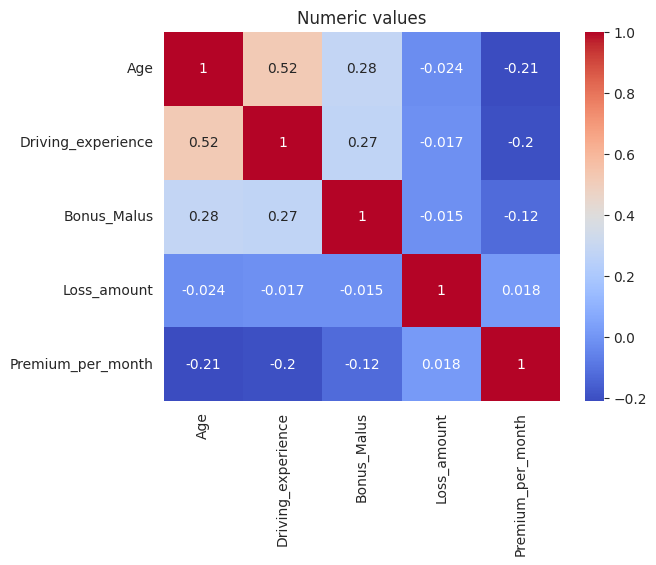

In [36]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Numeric values")
plt.show()

Age and driving experience have the most effect on insurance premiums.

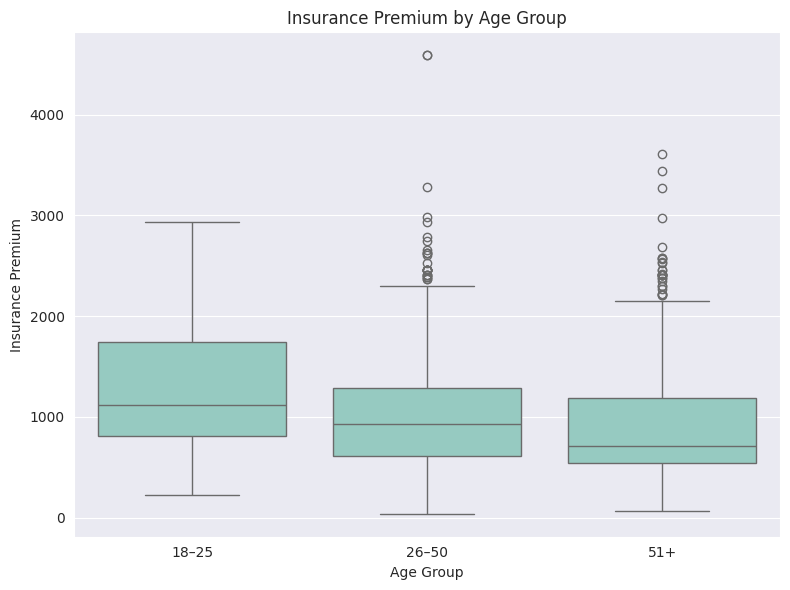

In [37]:
df['Age_group'] = pd.cut(df['Age'], bins=[17, 25, 50, 100], labels=['18–25', '26–50', '51+'])


plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_group', y='Premium_per_month', data=df)
plt.title('Insurance Premium by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Insurance Premium')
plt.tight_layout()
plt.show()

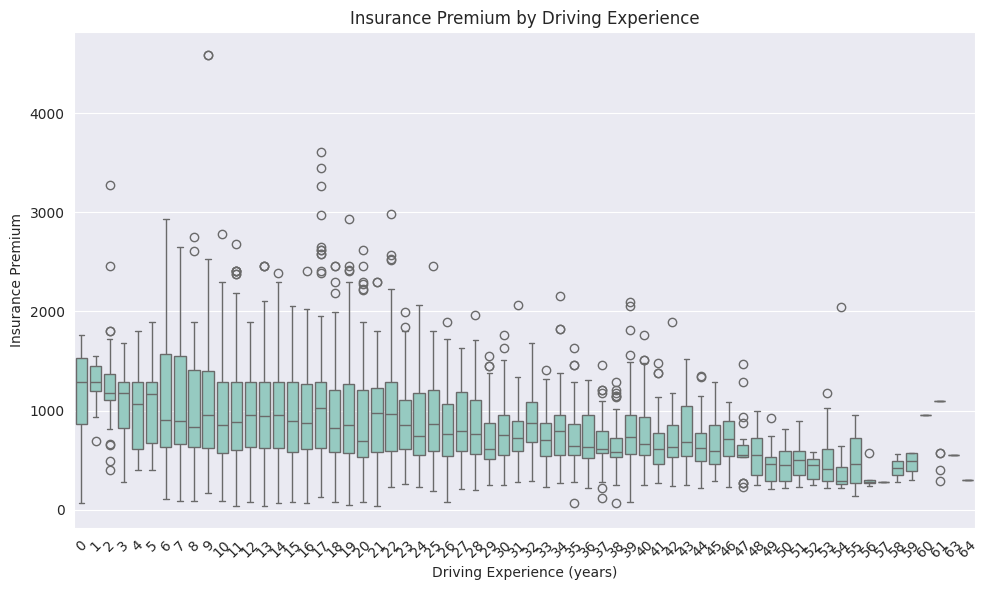

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Driving_experience', y='Premium_per_month', data=df)
plt.title('Insurance Premium by Driving Experience')
plt.xlabel('Driving Experience (years)')
plt.ylabel('Insurance Premium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
bins = [0, 2, 5, 10, 64]
labels = ['0–2 (High Risk)', '3–5', '6–10', '11+ (Low Risk)']
df['Driving_exp_group'] = pd.cut(df['Driving_experience'], bins=bins, labels=labels, right=True)

In [40]:
df['Age_group'] = df['Age_group'].astype(str)
df['Driving_exp_group'] = df['Driving_exp_group'].astype(str)

In [41]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols_boxplot = [col for col in cat_cols if col not in ['City', 'Insurance_period','Accident_region', 'Brand_Model']]

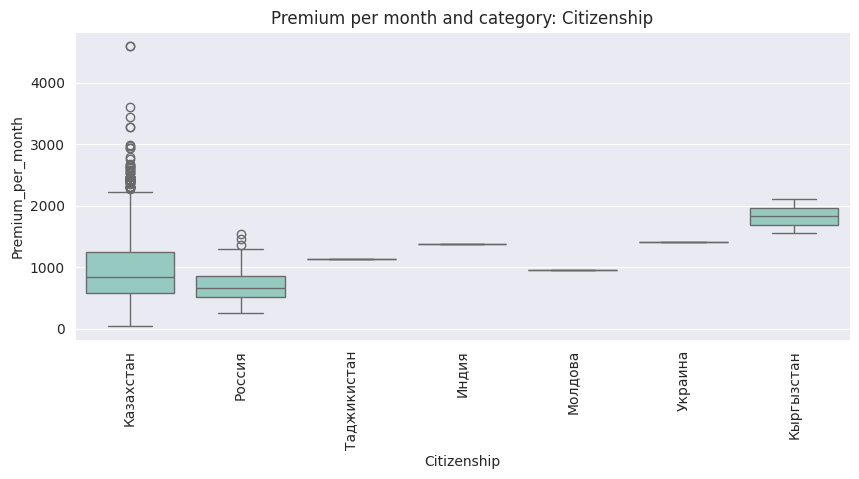

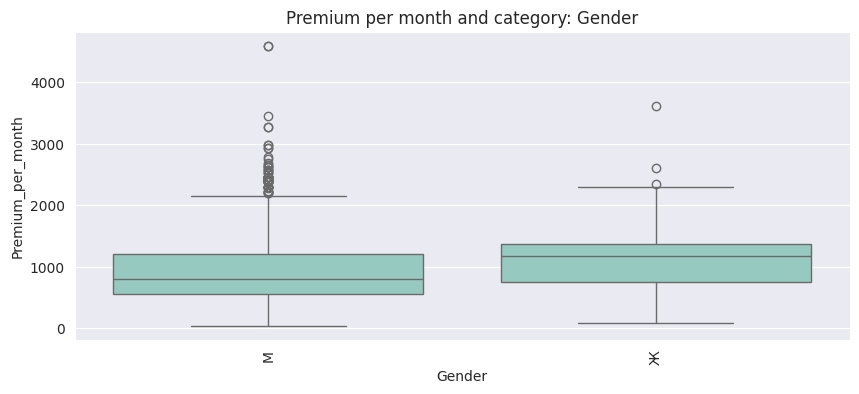

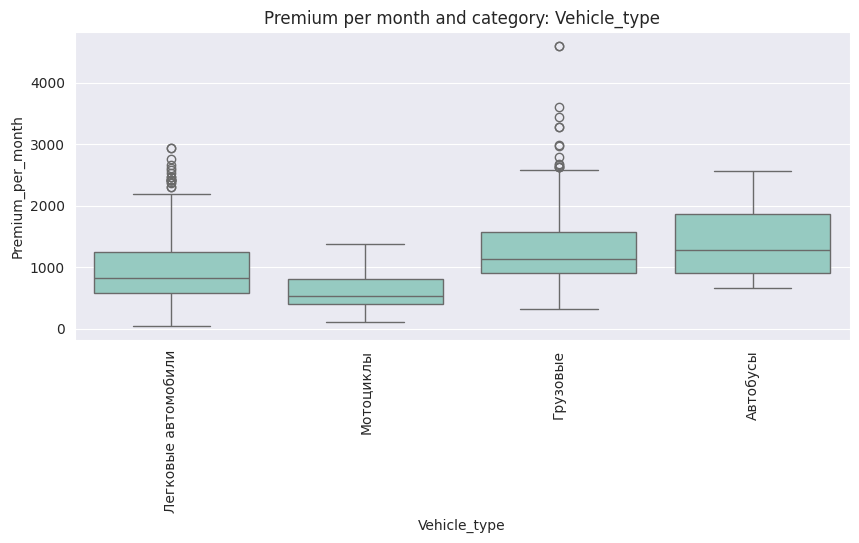

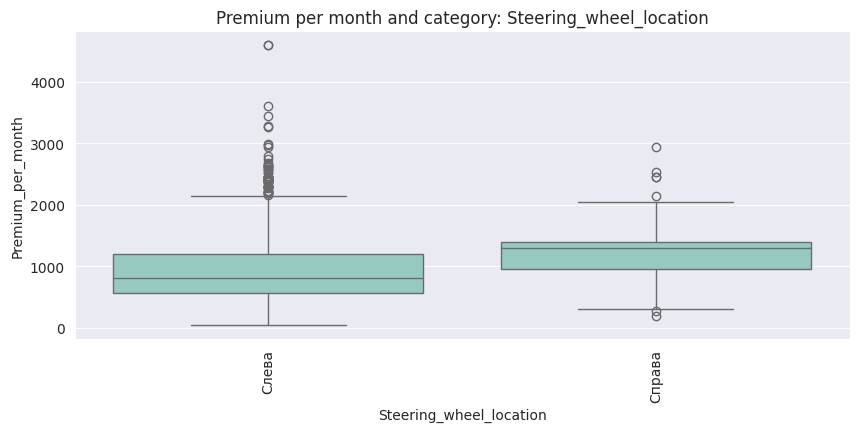

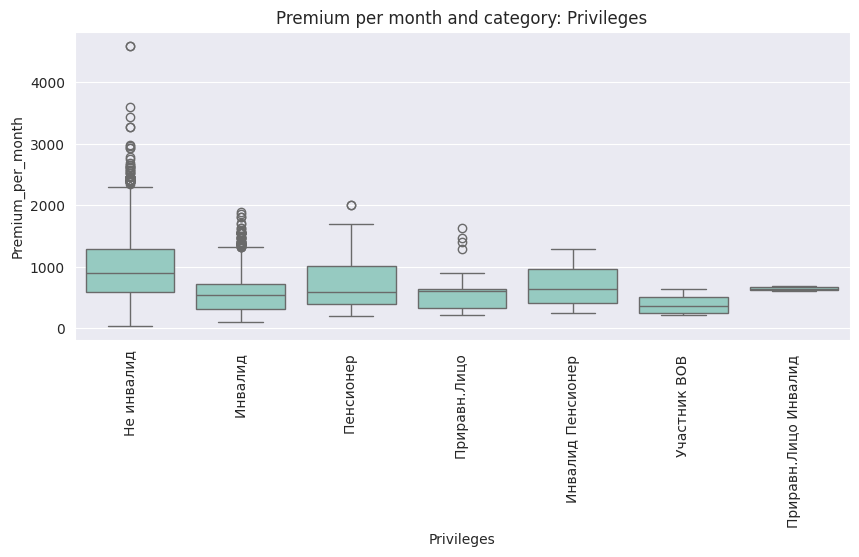

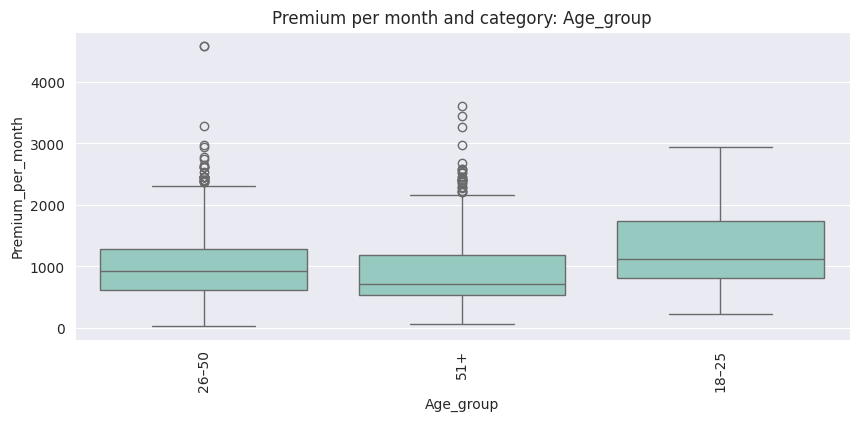

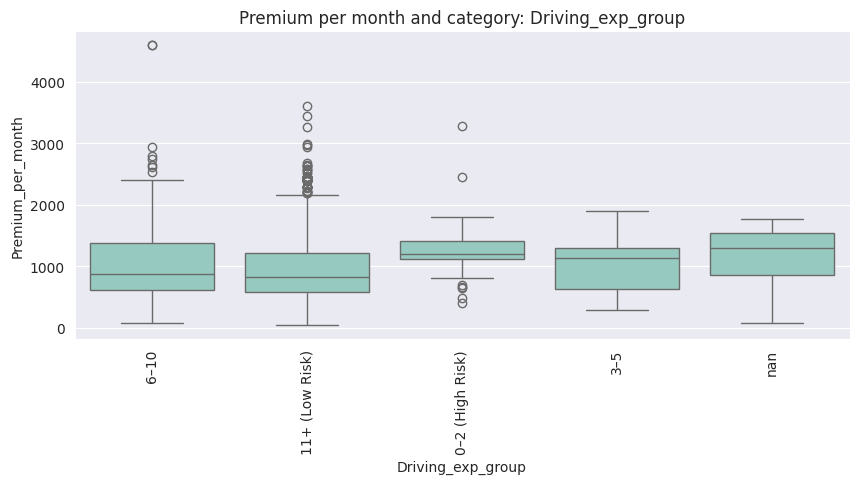

In [42]:
for col in cat_cols_boxplot:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=col, y='Premium_per_month', data=df)
    plt.xticks(rotation=90)
    plt.title(f"Premium per month and category: {col}")
    plt.show()

#Model Training

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
import numpy as np

## CatBoost

For CatBoost, the raw dataset with untouched categorical features is used, without applying any encoding.

In [44]:
cat_cols

Index(['Citizenship', 'Gender', 'City', 'Vehicle_type',
       'Steering_wheel_location', 'Insurance_period', 'Privileges',
       'Accident_region', 'Brand_Model', 'Age_group', 'Driving_exp_group'],
      dtype='object')

In [45]:
df.head(1)

,Age,Citizenship,Driving_experience,Gender,Bonus_Malus,City,Vehicle_type,Steering_wheel_location,Insurance_period,Privileges,Accident_region,Loss_amount,Car_age,Brand_Model,Premium_per_month,Age_group,Driving_exp_group
0,30,Казахстан,10,М,8,Алматы,Легковые автомобили,Слева,14.06.2013-13.06.2014,Не инвалид,Алматы,356479.0,25,Other Other,1355.769231,26–50,6–10


In [46]:
X = df[['Bonus_Malus','Car_age'] + cat_cols.tolist()]
y = df['Premium_per_month']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [49]:
from catboost import CatBoostRegressor

model_cb = CatBoostRegressor(verbose=0)
model_cb.fit(X_train, y_train, cat_features=cat_cols.tolist())

In [50]:
y_pred = model_cb.predict(X_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

RMSE: 214.31
MAE: 133.67
R²: 0.7299


Encoding is applied to prepare the dataset for use with the other models that require numeric inputs.

In [51]:
df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
X = pd.concat([df[['Bonus_Malus','Car_age']], df_encoded], axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Linear Regression

In [53]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
mae_scores = []
r2_scores = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)

print(f"Average RMSE of 5-Fold: {np.mean(rmse_scores):.2f}")
print(f"Average MAE of 5-Fold: {np.mean(mae_scores):.2f}")
print(f"Average R^2 of 5-Fold: {np.mean(r2_scores):.2f}")

Average RMSE of 5-Fold: 236.56
Average MAE of 5-Fold: 152.28
Average R^2 of 5-Fold: 0.69


##Random Forest

In [54]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 131.48458203621044
MSE: 47770.31763430007
RMSE: 218.5642185589857
R2 Score: 0.7335338100580845


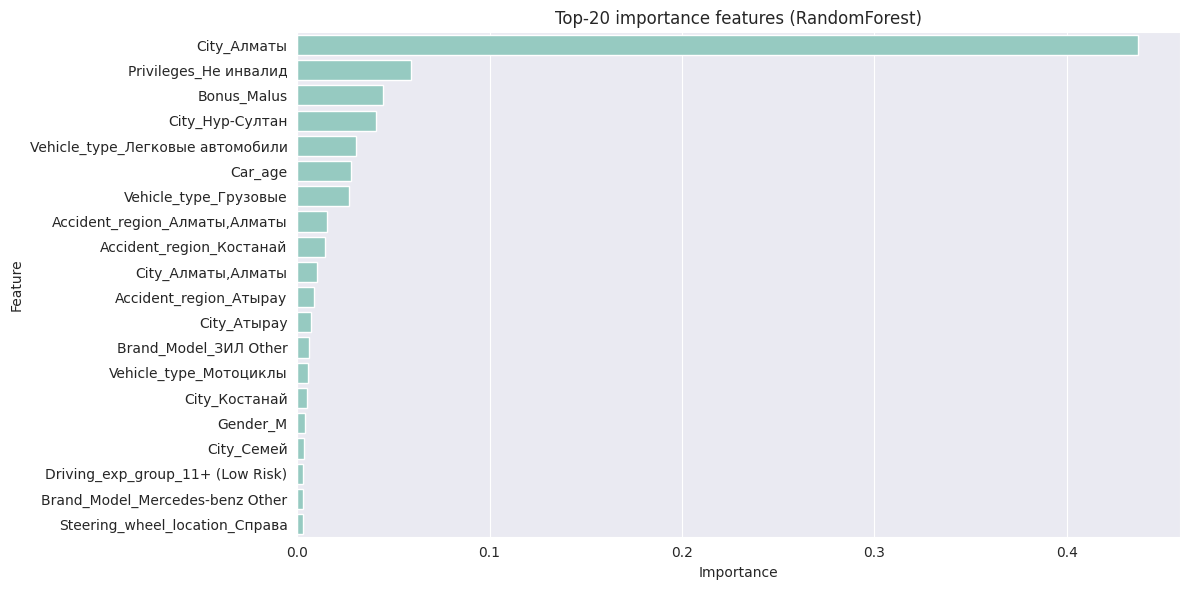

In [55]:
importances = rf.feature_importances_
feature_names = X.columns

feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances.head(20))
plt.title("Top-20 importance features (RandomForest)")
plt.tight_layout()
plt.show()

##SVM

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

In [58]:
# param_grid_svr = {
#     'C': [0.1, 1, 10, 100],
#     'epsilon': [0.1, 0.2, 0.5],
#     'kernel': ['linear']
# }

# grid_svr = GridSearchCV(
#     SVR(),
#     param_grid_svr,
#     cv=3,
#     scoring='neg_root_mean_squared_error'
# )

# grid_svr.fit(X_sample, y_sample)
# print("Best params (SVM):", grid_svr.best_params_)
# print("Best RMSE:", -grid_svr.best_score_)

By using GridSearchCV best SVM params were found.
kernel='linear', C=1, epsilon=0.5

In [59]:
svm = SVR(kernel='linear', C=1, epsilon=0.5)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM — RMSE: {rmse_svm:.2f}, MAE: {mae_svm:.2f}, R²: {r2_svm:.4f}")

SVM — RMSE: 227.80, MAE: 137.97, R²: 0.6948


## XGBoost

In [60]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [61]:
# param_dist = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [3, 4, 5, 6, 7],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'reg_alpha': [0, 0.01, 0.1],
#     'reg_lambda': [1, 1.5, 2],
# }

# xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     n_iter=30,
#     scoring='neg_root_mean_squared_error',
#     cv=5,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# random_search.fit(X_train, y_train)

# print("Best params:", random_search.best_params_)

In [62]:
best_params = {
    'subsample': 0.8,
    'reg_lambda': 1,
    'reg_alpha': 0.1,
    'n_estimators': 500,
    'max_depth': 5,
    'learning_rate': 0.05,
    'colsample_bytree': 0.8
}

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    **best_params
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [63]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 135.24592894230054
MSE: 47960.94215369274
RMSE: 218.99986793076553
R2 Score: 0.7179224811102938


# Model Performance Comparison

The table below summarizes the performance metrics (Root Mean Squared Error, Mean Absolute Error, and R² score) for several machine learning models applied to the insurance dataset.

| Model                          | RMSE   | MAE   | R²     |
|-------------------------------|--------|-------|--------|
| CatBoost             | 214.31  | 133.67 | 0.7299 |
| Random Forest                 | 218.56  | 131.48 | 0.7335 |
| Support Vector Machine (SVM)  | 227.8  | 137.97 | 0.6948 |
| Linear Regression             | 236.56  | 152.28 | 0.69 |
| XGBoost             | 218.99  | 135.24 | 0.71792 |

### Observations:
- The **Random Forest** model yields the best overall performance with the lowest RMSE and highest R² score.
- Feature engineering and cleaning leaded to noticeable performance improvement of all models.



## Conclusion

In this project, several machine learning models were developed and evaluated to predict the **insurance loss amount** using a real-world dataset containing driver demographics, vehicle specifications, and policy-related features.

### Key Takeaways:

- The **Random Forest Regressor** emerged as the top-performing model, achieving an **RMSE of 218.56**, **MAE of 131.48**, and an **R² score of 0.7335**. These results indicate that it captures complex, non-linear relationships in the data effectively and generalizes well.
- Both **Linear Regression** and **Support Vector Machine (SVM)** offered reasonable baseline results with R² scores of 0.69 and 0.6948, respectively. However, they lagged behind Random Forest in both error metrics and overall explanatory power.
- CatBoost showed competitive performance, with the lowest RMSE of 214.31 and a solid R² score of 0.7299. It effectively handled categorical features without requiring one-hot encoding, simplifying preprocessing and retaining performance.
- XGBoost also delivered strong results (R² of 0.7179, RMSE of 218.99), especially after hyperparameter tuning. While it didn't outperform Random Forest or CatBoost, it proved to be a robust and efficient alternative.
- The impact of **feature engineering** was significant: transforming variables, handling categorical features, and deriving meaningful groupings (e.g., `Age_group`, `Driving_exp_group`) helped improve model accuracy. This shows that the original features alone were not fully sufficient for optimal prediction.
- Additionally, consistent preprocessing and careful evaluation using **cross-validation** contributed to more robust performance estimates across all models.